In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Sets up our ability to query a SQLite database - or - it prepares the database file to be connected to later on
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# Sets up a foundation for us to build on 
Base = automap_base()

In [7]:
# We create classes so the code is separated and 
# systems can interact with specific subsets of data instead of the whole thing
Base.prepare(engine, reflect=True)

In [8]:
# Code references the classes that were mapped in each table
# we can now work in classes and not database tables
Base.classes.keys()

['measurement', 'station']

In [9]:
# Reference a specific class
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create a session link to our database - SQLAlchemy Session to query our database
session = Session(engine)

In [11]:
# reflect an existing database into a new model

# reflect the tables


In [12]:
# We can view all of the classes that automap found


In [13]:
# Save references to each table


In [31]:
# Create our session (link) from Py
print(session.query(Measurement.tempurature))

AttributeError: type object 'measurement' has no attribute 'tempurature'

# Exploratory Climate Analysis

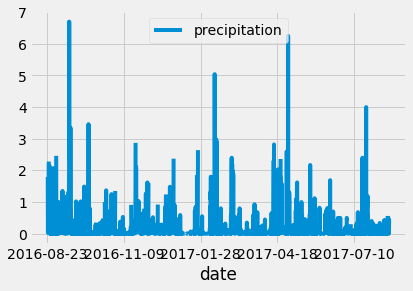

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)
# Turns the results from the query and makes tehm a list
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'],inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()


In [16]:
df

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


In [17]:
#df['month'] = pd.DatetimeIndex(df['date']).month
#df.head()

In [18]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9)]

In [19]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


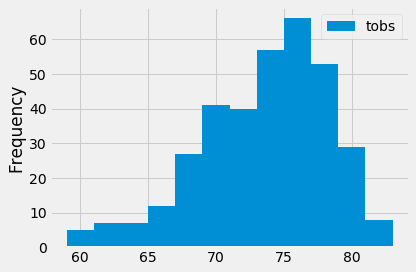

In [22]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
df.plot.hist(bins=12)
plt.tight_layout()

In [26]:
help(session.query(Measurement))

Help on Query in module sqlalchemy.orm.query object:

class Query(builtins.object)
 |  Query(entities, session=None)
 |  
 |  ORM-level SQL construction object.
 |  
 |  :class:`.Query` is the source of all SELECT statements generated by the
 |  ORM, both those formulated by end-user query operations as well as by
 |  high level internal operations such as related collection loading.  It
 |  features a generative interface whereby successive calls return a new
 |  :class:`.Query` object, a copy of the former with additional
 |  criteria and options associated with it.
 |  
 |  :class:`.Query` objects are normally initially generated using the
 |  :meth:`~.Session.query` method of :class:`.Session`, and in
 |  less common cases by instantiating the :class:`.Query` directly and
 |  associating with a :class:`.Session` using the :meth:`.Query.with_session`
 |  method.
 |  
 |  For a full walkthrough of :class:`.Query` usage, see the
 |  :ref:`ormtutorial_toplevel`.
 |  
 |  Methods define

# Challenge

In [64]:
results = session.query(Measurement.date, Measurement.tobs).all()
df = pd.DataFrame(results, columns=['date','tobs'])
df.head()

,date,tobs
0,2010-01-01,65.0
1,2010-01-02,63.0
2,2010-01-03,74.0
3,2010-01-04,76.0
4,2010-01-06,73.0


In [65]:
df['month'] = pd.DatetimeIndex(df['date']).month
df.tail()

,date,tobs,month
19545,2017-08-19,71.0,8
19546,2017-08-20,78.0,8
19547,2017-08-21,76.0,8
19548,2017-08-22,76.0,8
19549,2017-08-23,76.0,8


In [71]:
df_June = df.loc[df['month'] == 6]
df_June.head()

,date,tobs,month
133,2010-06-01,78.0,6
134,2010-06-02,76.0,6
135,2010-06-03,78.0,6
136,2010-06-04,76.0,6
137,2010-06-05,77.0,6


In [72]:
df_June['tobs'].describe()

count    1700.000000
mean       74.944118
std         3.257417
min        64.000000
25%        73.000000
50%        75.000000
75%        77.000000
max        85.000000
Name: tobs, dtype: float64

In [69]:
df_Dec = df.loc[df['month'] == 12]
df_Dec.head()

,date,tobs,month
305,2010-12-01,76.0,12
306,2010-12-03,74.0,12
307,2010-12-04,74.0,12
308,2010-12-06,64.0,12
309,2010-12-07,64.0,12


In [73]:
df_Dec['tobs'].describe()

count    1517.000000
mean       71.041529
std         3.745920
min        56.000000
25%        69.000000
50%        71.000000
75%        74.000000
max        83.000000
Name: tobs, dtype: float64

In [76]:
from sqlalchemy import extract

In [77]:
results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 6).all()
df = pd.DataFrame(results, columns=['date','tobs'])
df.head()

,date,tobs
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [78]:
df['tobs'].describe()

count    1700.000000
mean       74.944118
std         3.257417
min        64.000000
25%        73.000000
50%        75.000000
75%        77.000000
max        85.000000
Name: tobs, dtype: float64

In [79]:
results = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) == 12).all()
df = pd.DataFrame(results, columns=['date','tobs'])
df.head()

,date,tobs
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [80]:
df['tobs'].describe()

count    1517.000000
mean       71.041529
std         3.745920
min        56.000000
25%        69.000000
50%        71.000000
75%        74.000000
max        83.000000
Name: tobs, dtype: float64

In [ ]:
# The tempurature in June is typically 4 degrees higher than December.  
# Even though the means are very close in tempurature, the min temps are very far off.  The lowest temp in December is 8 
# degrees lower than the June minimum. 